# Load data

In [1]:
import pandas as pd
path='D:/VScode/Last_deglaciation/data_fig3/'

# read the df_full_orbital.csv
df_full_orbital_EBM=pd.read_csv(path+'df_full_orbital_EBM.csv')
# read the df_obl.csv
df_obl_EBM=pd.read_csv(path+'df_obl_EBM.csv')
# read the df_pre_EBM.csv
df_pre_EBM=pd.read_csv(path+'df_pre_EBM.csv')

# load orbital parameters
df_ecc=pd.read_csv(path+'df_ecc.csv')
df_pre=pd.read_csv(path+'df_pre.csv')
df_obl=pd.read_csv(path+'df_obl.csv')

In [2]:
df_full_orbital_EBM

,age,60S summer inso (21 Dec to 21 Feb),Inter_summer_inso,SAT (50 to 70S),iceA (SH)
0,10000,422.298845,5.581142,11.524419,34.217891
1,11000,424.324255,5.592985,11.507345,34.375834
2,12000,427.545024,5.587394,11.495540,34.505933
3,13000,431.666862,5.588376,11.485514,34.630841
4,14000,436.307898,5.547682,11.476162,34.759407
5,15000,441.042098,5.558740,11.462132,34.920556
6,16000,445.443648,5.524544,11.453511,35.056227
7,17000,449.069732,5.537730,11.447892,35.174211
8,18000,451.572541,5.525079,11.441573,35.301578
9,19000,452.628371,5.484472,11.425708,35.486833


# Plot

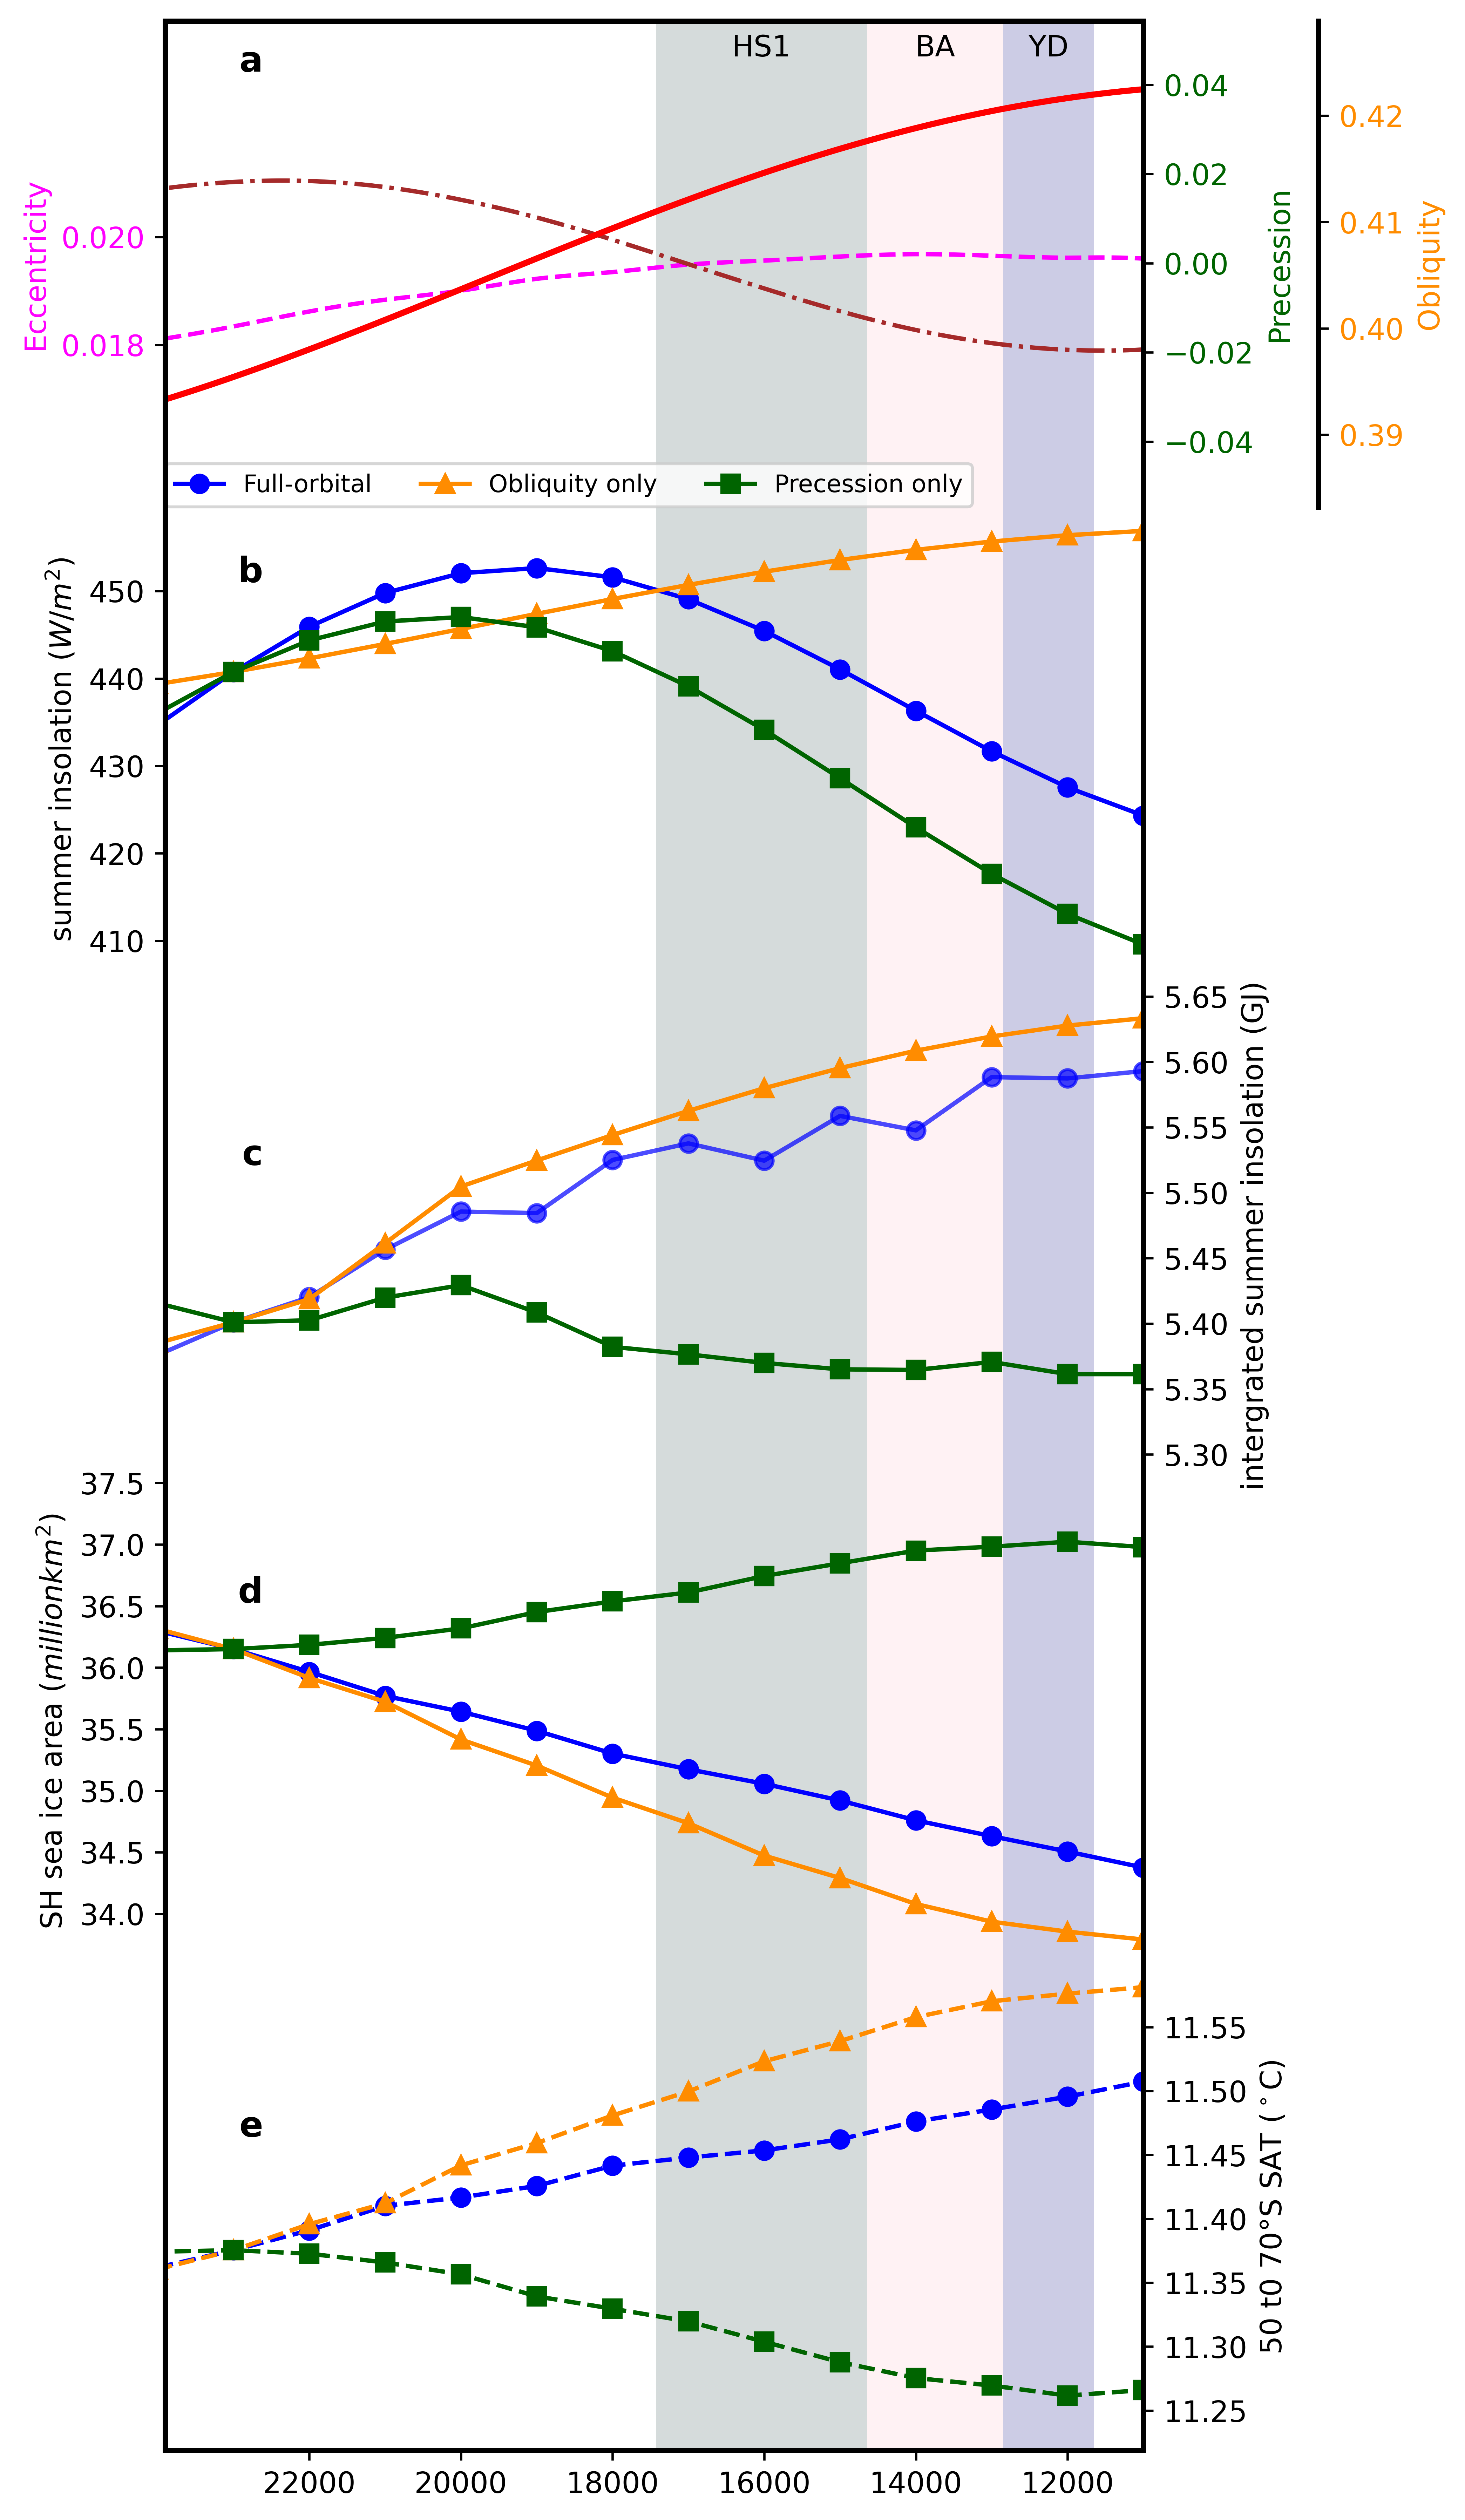

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches


# Periods for the vertical grey bars
HS1 = np.array([17480, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

# Define the grey color with a transparency using RGBA tuple
grey_color = (0.8, 0.8, 0.8, 0.5)  # Grey color with 50% transparency.

# Function to add grey bars to the subplots
def add_grey_bars(ax):

    ax.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0,zorder=-1)


emb_color=['blue','darkorange','darkgreen']
emb_symbol=['o','^','s']
# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(6, 15), dpi=600,sharex=True)



# Plot Eccentricity
axs[0].plot(df_ecc['age'], df_ecc['ecc'], color='magenta', label='Eccentricity', linestyle='--')
axs[0].set_ylabel('Eccentricity', color='magenta')
# set y axis limit
axs[0].set_ylim(0.015, 0.024)
# set y ticks
axs[0].set_yticks([0.018, 0.02])
axs[0].tick_params(axis='y', labelcolor='magenta')
axs[0].spines['bottom'].set_visible(False)

axs[0].text(x=np.mean(HS1), y=0.99 * np.max(axs[0].get_ylim()), s='HS1', ha='center', va='top')
axs[0].text(x=np.mean(BA), y=0.99 * np.max(axs[0].get_ylim()), s='BA', ha='center', va='top')
axs[0].text(x=np.mean(YD), y=0.99 * np.max(axs[0].get_ylim()), s='YD', ha='center', va='top')
# invert the x axis
axs[0].invert_xaxis()
axs[0].set_xlim(30000,10000)

# Create first twin axis for Precession
ax0_1 = axs[0].twinx()
ax0_1.plot(df_pre['age'], df_pre['pre'], color='brown', label='Precession', linestyle='-.')
ax0_1.set_ylabel('Precession', color='darkgreen')
ax0_1.tick_params(axis='y', labelcolor='darkgreen')
# show y axis and ticks on the right
ax0_1.yaxis.tick_right()
ax0_1.yaxis.set_label_position("right")
ax0_1.spines['bottom'].set_visible(False)

# Create second twin axis for Obliquity, positioned on the right
# plot obl data in dark blue
ax0_2 = axs[0].twinx()
ax0_2.plot(df_obl['age'], df_obl['obl'], color='red', label='Obliquity',linewidth=2.1)
ax0_2.set_ylabel('Obliquity', color='darkorange')
ax0_2.tick_params(axis='y', labelcolor='darkorange')
# set the line width of the y axis to 1.8
ax0_2.spines['right'].set_linewidth(1.8)

# Adjust the position of the second twin axis
ax0_2.spines['right'].set_position(('outward', 60))  # Offset the right spine of ax0_2
ax0_2.spines['bottom'].set_visible(False)

	
axs[1].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['60S summer inso (21 Dec to 21 Feb)'], color=emb_color[0], marker=emb_symbol[0],alpha=1,label='Full-orbital')
axs[1].plot(df_obl_EBM['age'], df_obl_EBM['60S summer inso (21 Dec to 21 Feb)'], color=emb_color[1], marker=emb_symbol[1],alpha=1,label='Obliquity only')
axs[1].plot(df_pre_EBM['age'], df_pre_EBM['60S summer inso (21 Dec to 21 Feb)'], color=emb_color[2], marker=emb_symbol[2],alpha=1,label='Precession only')
# set y axis limit
# axs[1].set_ylim(410, 460)
axs[1].legend(loc=[0,1], ncol=3, fontsize='small')
axs[1].set_ylabel('summer insolation ($W/m^2$)')
axs[1].tick_params(axis='y')
# set x axis limit
axs[1].set_xlim(23900,11000)

# ax2 = axs[1].twinx()
axs[2].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['Inter_summer_inso'], alpha=0.7,color=emb_color[0], marker=emb_symbol[0], label='Full-orbital')
axs[2].plot(df_obl_EBM['age'], df_obl_EBM['Inter_summer_inso'], color=emb_color[1], marker=emb_symbol[1], alpha=1,label='Obliquity only')
axs[2].plot(df_pre_EBM['age'], df_pre_EBM['Inter_summer_inso'], color=emb_color[2], marker=emb_symbol[2],label='Precession only')
# axs[2].legend(loc='upper left', ncol=3, fontsize='small')
axs[2].set_ylabel('intergrated summer insolation (GJ)')
axs[2].tick_params(axis='y')
# show y ticks and y tick labels on the right
axs[2].yaxis.tick_right()
axs[2].yaxis.set_label_position("right")



axs[3].spines['top'].set_visible(False)
axs[3].spines['bottom'].set_visible(False)
# plot the full orbital iceA (SH)
axs[3].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['iceA (SH)'], color=emb_color[0], marker=emb_symbol[0], label='Full-orbital')
# plot the obliquity only iceA (SH)
axs[3].plot(df_obl_EBM['age'], df_obl_EBM['iceA (SH)'], color=emb_color[1], marker=emb_symbol[1], label='Obliquity only')
# plot the precession only iceA (SH)
axs[3].plot(df_pre_EBM['age'], df_pre_EBM['iceA (SH)'], color=emb_color[2], marker=emb_symbol[2],label='Precession only')
# add y axis label
axs[3].set_ylabel('SH sea ice area ($million km^2$)')



# plot the full orbital SAT (50 to 70S)
axs[4].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['SAT (50 to 70S)'], color=emb_color[0], marker=emb_symbol[0], linestyle='--')
# plot the obliquity only SAT (50 to 70S)
axs[4].plot(df_obl_EBM['age'], df_obl_EBM['SAT (50 to 70S)'], color=emb_color[1], marker=emb_symbol[1], linestyle='--')
# plot the precession only SAT (50 to 70S)
axs[4].plot(df_pre_EBM['age'], df_pre_EBM['SAT (50 to 70S)'], color=emb_color[2], marker=emb_symbol[2], linestyle='--')
axs[4].spines['top'].set_visible(False)
# set y ticks and y tick labels on the right
axs[4].yaxis.tick_right()
axs[4].yaxis.set_label_position("right")
# add y axis label
axs[4].set_ylabel('50 t0 70°S SAT ($^\circ$C)')


# set the boundary between the two subplots to be invisible
axs[0].spines['bottom'].set_visible(False)
ax0_1.spines['bottom'].set_visible(False)
ax0_2.spines['bottom'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[3].spines['top'].set_visible(False)
axs[3].spines['bottom'].set_visible(False)



# Label for subplots
axs[0].text(0.1, 0.95, 'a', transform=axs[0].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[1].text(0.1, 0.9, 'b', transform=axs[1].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[2].text(0.1, 0.7, 'c', transform=axs[2].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[3].text(0.1, 0.8, 'd', transform=axs[3].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[4].text(0.1, 0.7, 'e', transform=axs[4].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')



# Get the coordinates for the axes
top = axs[0].get_position().y1
bottom = axs[-1].get_position().y0
left = axs[0].get_position().x0  # Assuming the left y-axis is used
right = axs[0].get_position().x1  # Assuming the right y-axis is not extended

# Create a box that connects all y-axes and the top of the first subplot, and the bottom of the last subplot
# The coordinates are adjusted so that the left and right sides of the box align with the y-axis line
box = patches.FancyBboxPatch(
    (left, bottom), right-left, top-bottom,
    transform=fig.transFigure, boxstyle="square,pad=0", 
    ec="black", fc="none", lw=1.8, clip_on=False
)

# Add the box to the figure
fig.patches.extend([box])

for ax in axs:
    add_grey_bars(ax)


# adjust vertical space between subplots
fig.subplots_adjust(hspace=0)

# Show plot
plt.show()

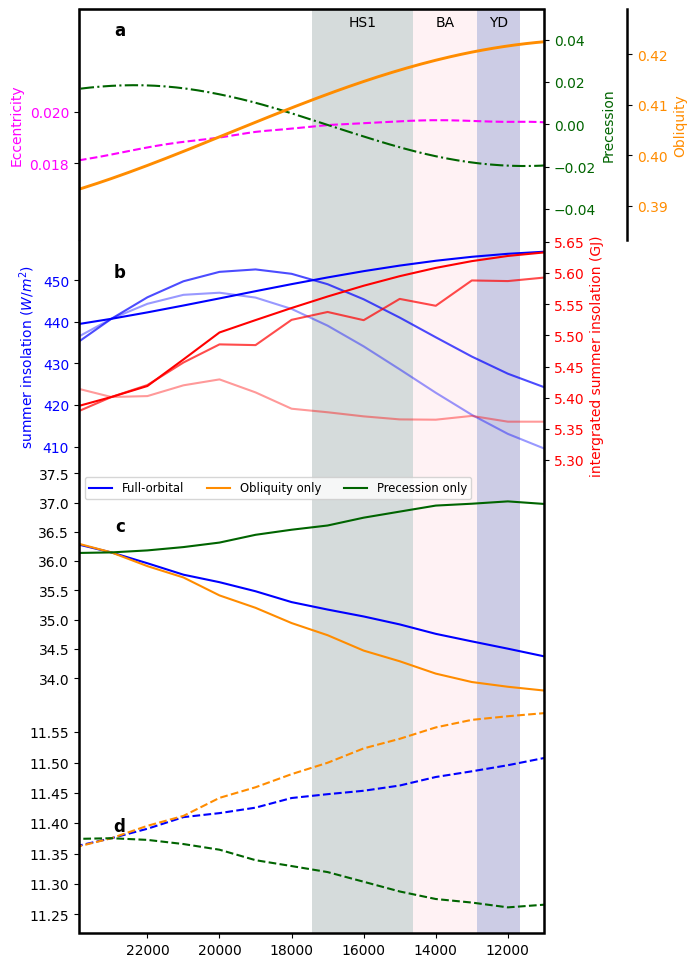

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches


# Periods for the vertical grey bars
HS1 = np.array([17480, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

# Define the grey color with a transparency using RGBA tuple
grey_color = (0.8, 0.8, 0.8, 0.5)  # Grey color with 50% transparency.

# Function to add grey bars to the subplots
def add_grey_bars(ax):

    ax.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0,zorder=-1)


# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(6, 12), dpi=100,sharex=True)



# Plot Eccentricity
axs[0].plot(df_ecc['age'], df_ecc['ecc'], color='magenta', label='Eccentricity', linestyle='--')
axs[0].set_ylabel('Eccentricity', color='magenta')
# set y axis limit
axs[0].set_ylim(0.015, 0.024)
# set y ticks
axs[0].set_yticks([0.018, 0.02])
axs[0].tick_params(axis='y', labelcolor='magenta')
axs[0].spines['bottom'].set_visible(False)

axs[0].text(x=np.mean(HS1), y=0.99 * np.max(axs[0].get_ylim()), s='HS1', ha='center', va='top')
axs[0].text(x=np.mean(BA), y=0.99 * np.max(axs[0].get_ylim()), s='BA', ha='center', va='top')
axs[0].text(x=np.mean(YD), y=0.99 * np.max(axs[0].get_ylim()), s='YD', ha='center', va='top')
# invert the x axis
axs[0].invert_xaxis()
axs[0].set_xlim(30000,10000)

# Create first twin axis for Precession
ax0_1 = axs[0].twinx()
ax0_1.plot(df_pre['age'], df_pre['pre'], color='darkgreen', label='Precession', linestyle='-.')
ax0_1.set_ylabel('Precession', color='darkgreen')
ax0_1.tick_params(axis='y', labelcolor='darkgreen')
# show y axis and ticks on the right
ax0_1.yaxis.tick_right()
ax0_1.yaxis.set_label_position("right")
ax0_1.spines['bottom'].set_visible(False)

# Create second twin axis for Obliquity, positioned on the right
# plot obl data in dark blue
ax0_2 = axs[0].twinx()
ax0_2.plot(df_obl['age'], df_obl['obl'], color='darkorange', label='Obliquity',linewidth=2.1)
ax0_2.set_ylabel('Obliquity', color='darkorange')
ax0_2.tick_params(axis='y', labelcolor='darkorange')
# set the line width of the y axis to 1.8
ax0_2.spines['right'].set_linewidth(1.8)

# Adjust the position of the second twin axis
ax0_2.spines['right'].set_position(('outward', 60))  # Offset the right spine of ax0_2
ax0_2.spines['bottom'].set_visible(False)


ax1 = axs[1]
	
axs[1].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['60S summer inso (21 Dec to 21 Feb)'], alpha=0.7,color='blue', label='summer inso60s, full orbital')
axs[1].plot(df_obl_EBM['age'], df_obl_EBM['60S summer inso (21 Dec to 21 Feb)'], color='blue', alpha=1,label='summer inso60s, obl only')
axs[1].plot(df_pre_EBM['age'], df_pre_EBM['60S summer inso (21 Dec to 21 Feb)'], color='blue', alpha=0.4,label='summer inso60s, pre only')


axs[1].set_ylabel('summer insolation ($W/m^2$)', color='blue')
axs[1].tick_params(axis='y', labelcolor='blue')

ax2 = axs[1].twinx()
ax2.plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['Inter_summer_inso'], alpha=0.7,color='red', label='df_inter_ann data')
ax2.plot(df_obl_EBM['age'], df_obl_EBM['Inter_summer_inso'], color='red', alpha=1,label='df_inter_ann data')
ax2.plot(df_pre_EBM['age'], df_pre_EBM['Inter_summer_inso'], color='red', alpha=0.4,label='df_inter_ann data')

ax2.set_ylabel('intergrated summer insolation (GJ)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# set x axis limit
ax1.set_xlim(23900,11000)


axs[2].spines['top'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
# plot the full orbital iceA (SH)
axs[2].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['iceA (SH)'], color='blue', label='Full-orbital')
# plot the obliquity only iceA (SH)
axs[2].plot(df_obl_EBM['age'], df_obl_EBM['iceA (SH)'], color='darkorange', label='Obliquity only')
# plot the precession only iceA (SH)
axs[2].plot(df_pre_EBM['age'], df_pre_EBM['iceA (SH)'], color='darkgreen', label='Precession only')
# show legend
axs[2].legend(loc='upper left', ncol=3, fontsize='small')


# plot the full orbital SAT (50 to 70S)
axs[3].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['SAT (50 to 70S)'], color='blue', linestyle='--')
# plot the obliquity only SAT (50 to 70S)
axs[3].plot(df_obl_EBM['age'], df_obl_EBM['SAT (50 to 70S)'], color='darkorange', linestyle='--')
# plot the precession only SAT (50 to 70S)
axs[3].plot(df_pre_EBM['age'], df_pre_EBM['SAT (50 to 70S)'], color='darkgreen', linestyle='--')
axs[3].spines['top'].set_visible(False)


# set the boundary between the two subplots to be invisible
axs[0].spines['bottom'].set_visible(False)
ax0_1.spines['bottom'].set_visible(False)
ax0_2.spines['bottom'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[3].spines['top'].set_visible(False)
axs[3].spines['bottom'].set_visible(False)



# Label for subplots
axs[0].text(0.1, 0.95, 'a', transform=axs[0].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[1].text(0.1, 0.9, 'b', transform=axs[1].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[2].text(0.1, 0.8, 'c', transform=axs[2].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[3].text(0.1, 0.5, 'd', transform=axs[3].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')


# Get the coordinates for the axes
top = axs[0].get_position().y1
bottom = axs[-1].get_position().y0
left = axs[0].get_position().x0  # Assuming the left y-axis is used
right = axs[0].get_position().x1  # Assuming the right y-axis is not extended

# Create a box that connects all y-axes and the top of the first subplot, and the bottom of the last subplot
# The coordinates are adjusted so that the left and right sides of the box align with the y-axis line
box = patches.FancyBboxPatch(
    (left, bottom), right-left, top-bottom,
    transform=fig.transFigure, boxstyle="square,pad=0", 
    ec="black", fc="none", lw=1.8, clip_on=False
)

# Add the box to the figure
fig.patches.extend([box])

for ax in axs:
    add_grey_bars(ax)


# adjust vertical space between subplots
fig.subplots_adjust(hspace=0)

# Show plot
plt.show()